# Hose Sales Prediction (Keras-Regression vs Multiple Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# install seaborn library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
Data = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
Data.head(5)
Data.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
# let's drop unnecessory featurs
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [6]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

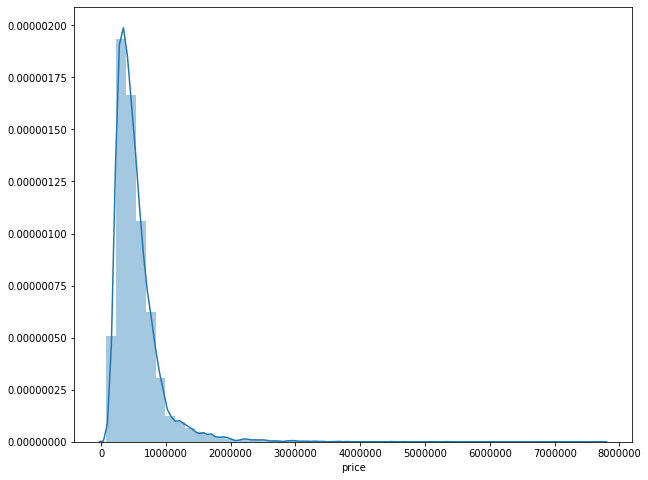

In [7]:
#visualizing target
plt.figure(figsize = (10,8))
sns.distplot(Data['price'])

In [8]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64

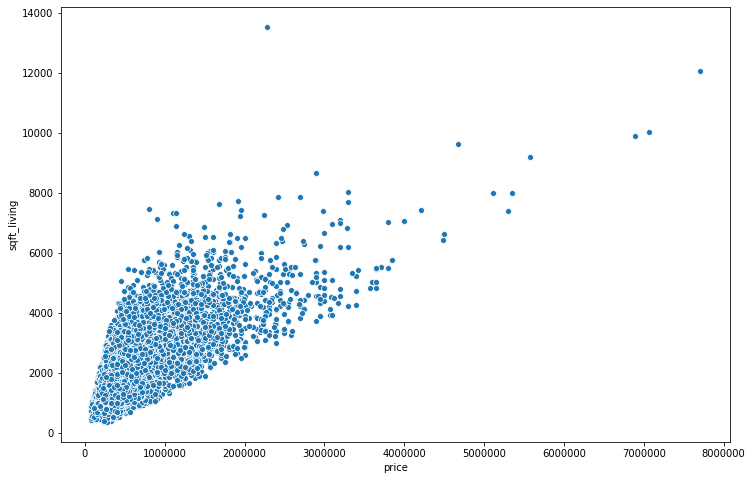

In [9]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

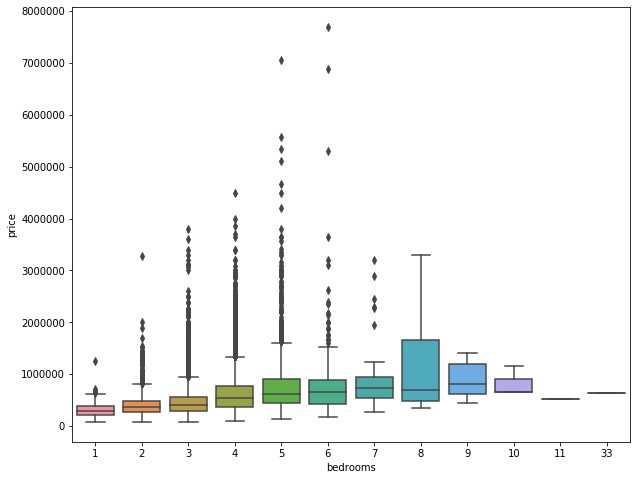

In [13]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

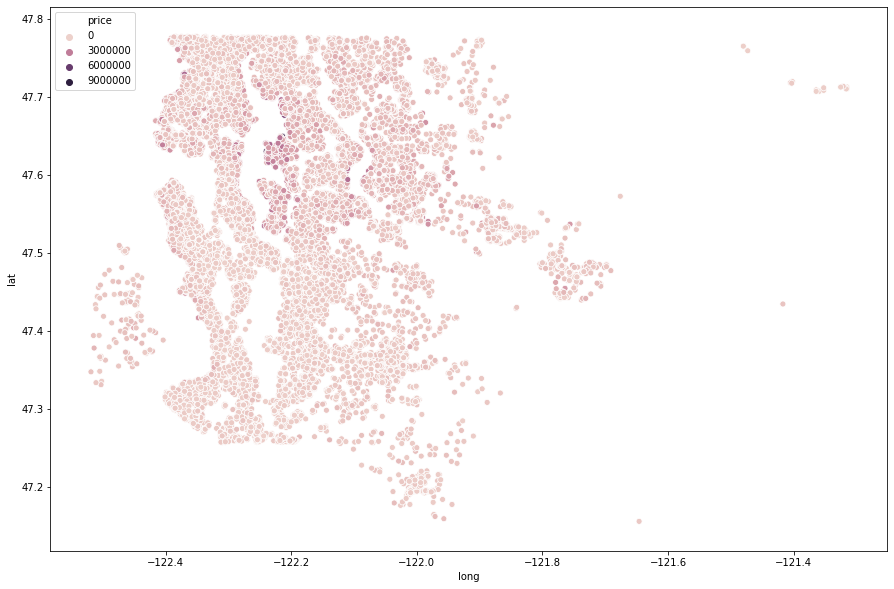

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=Data,hue='price')

In [20]:
#let's clean it the map a bit - we are taking 99% bottom price houses
non_top_1_perc = Data.sort_values('price',ascending = False).iloc[216:]



In [19]:
len(Data)*0.01

215.97

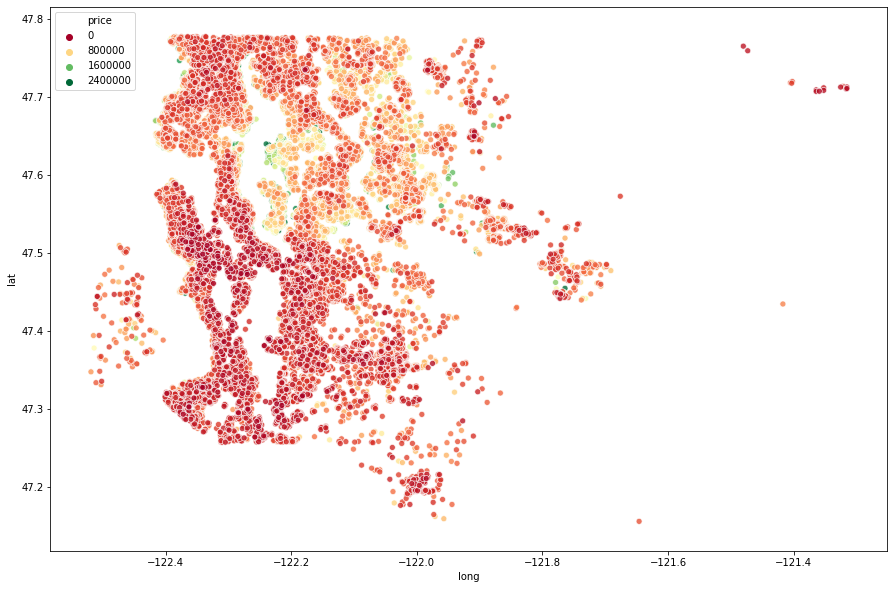

In [29]:
# let's try this one again
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,alpha = 0.8,palette = 'RdYlGn', hue='price')

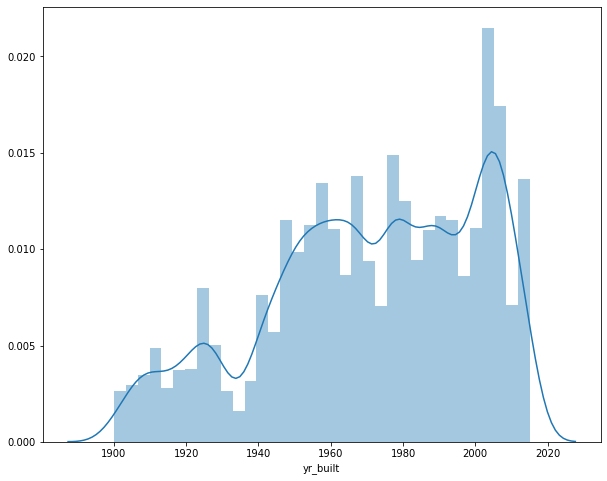

In [15]:
plt.figure(figsize = (10,8))
sns.distplot(Data['yr_built'])

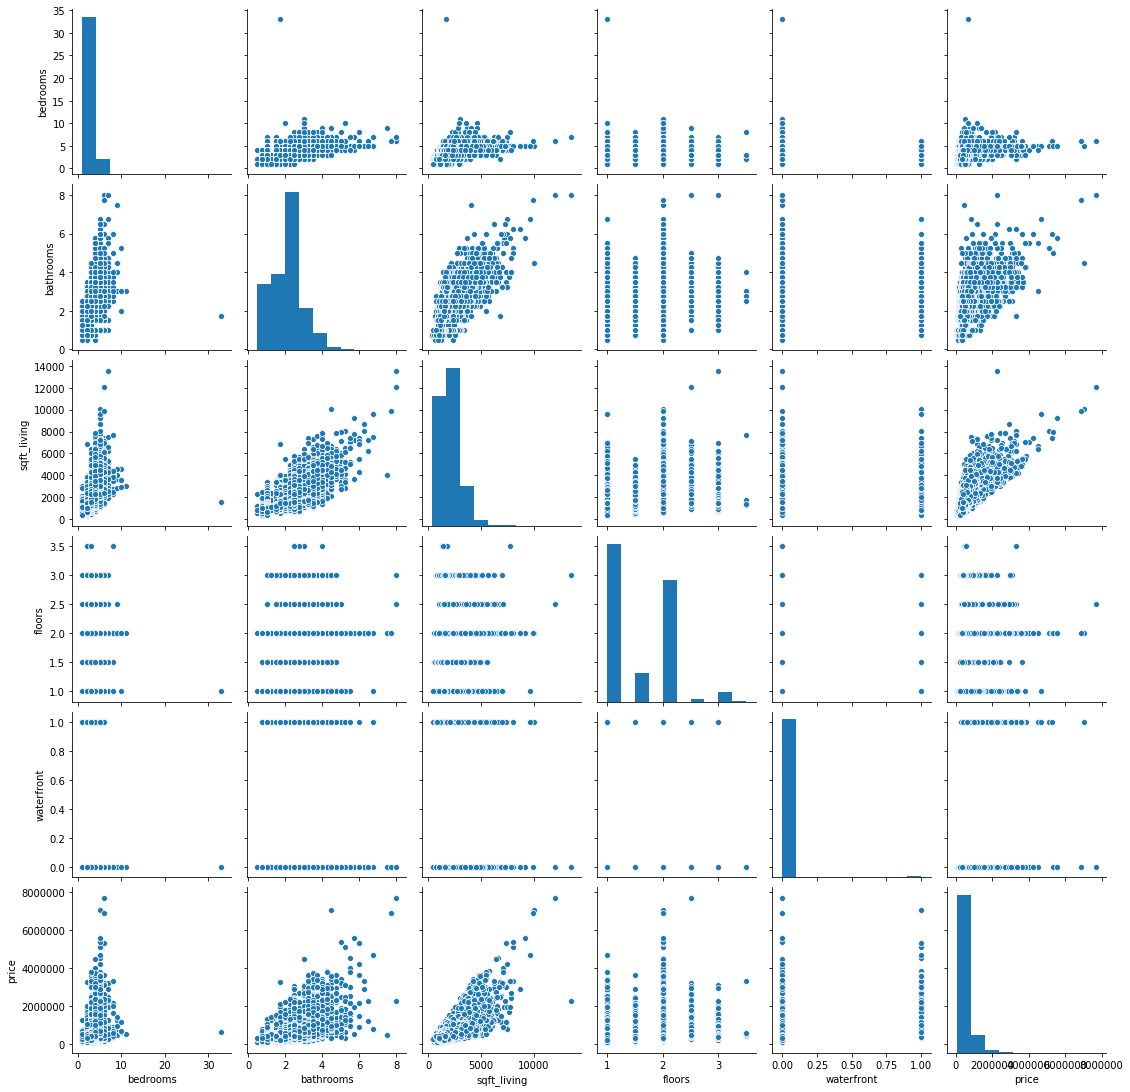

In [30]:
#visualizing data
sns.pairplot(Data['bedrooms bathrooms sqft_living floors waterfront price'.split()])

In [31]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


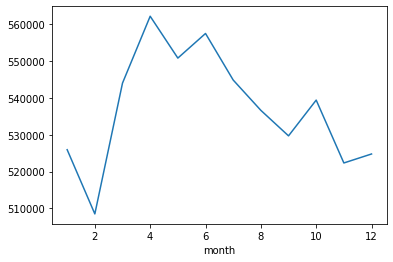

In [32]:
Data.groupby('month').mean()['price'].plot()

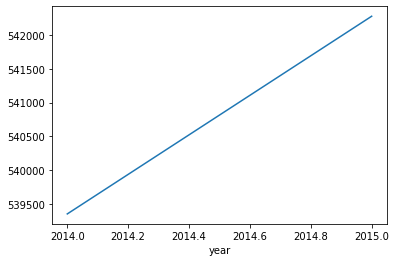

In [34]:
Data.groupby('year').mean()['price'].plot()

In [35]:
# we can drop date as well (we broke it down to month and year)
Data = Data.drop('date',axis=1)

KeyError: "['date'] not found in axis"

In [36]:
Data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


# Scaling and Train Test Split


In [41]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Feature Scalling 

In [42]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Keras Regression

In [43]:
# creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [44]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [45]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 0s 2ms/step - loss: 431844982784.0000 - val_loss: 416702038016.0000
Epoch 2/400
114/114 [==============================] - 0s 1ms/step - loss: 430700331008.0000 - val_loss: 412243492864.0000
Epoch 3/400
114/114 [==============================] - 0s 2ms/step - loss: 409514442752.0000 - val_loss: 360199028736.0000
Epoch 4/400
114/114 [==============================] - ETA: 0s - loss: 299827298304.00 - 0s 2ms/step - loss: 294968852480.0000 - val_loss: 188070739968.0000
Epoch 5/400
114/114 [==============================] - 0s 2ms/step - loss: 127598796800.0000 - val_loss: 87424548864.0000
Epoch 6/400
114/114 [==============================] - 0s 2ms/step - loss: 79551979520.0000 - val_loss: 70538829824.0000
Epoch 7/400
114/114 [==============================] - 0s 2ms/step - loss: 66543833088.0000 - val_loss: 61931495424.0000
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 59917365248.0000 - val_loss: 573122

Epoch 68/400
114/114 [==============================] - 0s 2ms/step - loss: 32412016640.0000 - val_loss: 31449866240.0000
Epoch 69/400
114/114 [==============================] - 0s 3ms/step - loss: 32333137920.0000 - val_loss: 31380414464.0000
Epoch 70/400
114/114 [==============================] - 0s 3ms/step - loss: 32267311104.0000 - val_loss: 31345809408.0000
Epoch 71/400
114/114 [==============================] - 0s 3ms/step - loss: 32257308672.0000 - val_loss: 31410053120.0000
Epoch 72/400
114/114 [==============================] - 0s 2ms/step - loss: 32226846720.0000 - val_loss: 31276517376.0000
Epoch 73/400
114/114 [==============================] - 0s 2ms/step - loss: 32174465024.0000 - val_loss: 31213711360.0000
Epoch 74/400
114/114 [==============================] - 0s 3ms/step - loss: 32146991104.0000 - val_loss: 31173783552.0000
Epoch 75/400
114/114 [==============================] - 0s 2ms/step - loss: 32096399360.0000 - val_loss: 31126401024.0000
Epoch 76/400
114/114 [==

Epoch 135/400
114/114 [==============================] - 0s 3ms/step - loss: 30478030848.0000 - val_loss: 29443348480.0000
Epoch 136/400
114/114 [==============================] - 0s 3ms/step - loss: 30459056128.0000 - val_loss: 29587501056.0000
Epoch 137/400
114/114 [==============================] - 0s 3ms/step - loss: 30440509440.0000 - val_loss: 29383342080.0000
Epoch 138/400
114/114 [==============================] - 0s 2ms/step - loss: 30397018112.0000 - val_loss: 29363771392.0000
Epoch 139/400
114/114 [==============================] - 0s 2ms/step - loss: 30339328000.0000 - val_loss: 29387464704.0000
Epoch 140/400
114/114 [==============================] - 0s 2ms/step - loss: 30385584128.0000 - val_loss: 29313681408.0000
Epoch 141/400
114/114 [==============================] - 0s 2ms/step - loss: 30332442624.0000 - val_loss: 29293549568.0000
Epoch 142/400
114/114 [==============================] - 0s 2ms/step - loss: 30315298816.0000 - val_loss: 29328787456.0000
Epoch 143/400
11

114/114 [==============================] - 0s 2ms/step - loss: 29226452992.0000 - val_loss: 27932846080.0000
Epoch 202/400
114/114 [==============================] - 0s 2ms/step - loss: 29168664576.0000 - val_loss: 27922911232.0000
Epoch 203/400
114/114 [==============================] - 0s 3ms/step - loss: 29113911296.0000 - val_loss: 28049309696.0000
Epoch 204/400
114/114 [==============================] - 0s 2ms/step - loss: 29151213568.0000 - val_loss: 27871447040.0000
Epoch 205/400
114/114 [==============================] - 0s 2ms/step - loss: 29102647296.0000 - val_loss: 27851638784.0000
Epoch 206/400
114/114 [==============================] - 0s 2ms/step - loss: 29083633664.0000 - val_loss: 27918196736.0000
Epoch 207/400
114/114 [==============================] - 0s 2ms/step - loss: 29092014080.0000 - val_loss: 27865128960.0000
Epoch 208/400
114/114 [==============================] - 0s 2ms/step - loss: 29086945280.0000 - val_loss: 27804987392.0000
Epoch 209/400
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 28167598080.0000 - val_loss: 26854787072.0000
Epoch 268/400
114/114 [==============================] - 0s 2ms/step - loss: 28164431872.0000 - val_loss: 26845831168.0000
Epoch 269/400
114/114 [==============================] - 0s 2ms/step - loss: 28169109504.0000 - val_loss: 26862829568.0000
Epoch 270/400
114/114 [==============================] - 0s 2ms/step - loss: 28164315136.0000 - val_loss: 26841475072.0000
Epoch 271/400
114/114 [==============================] - 0s 2ms/step - loss: 28195698688.0000 - val_loss: 26826151936.0000
Epoch 272/400
114/114 [==============================] - 0s 2ms/step - loss: 28117104640.0000 - val_loss: 26829592576.0000
Epoch 273/400
114/114 [==============================] - 0s 2ms/step - loss: 28154574848.0000 - val_loss: 26831912960.0000
Epoch 274/400
114/114 [==============================] - 0s 2ms/step - loss: 28186685440.0000 - val_loss: 26813212672.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 27671652352.0000 - val_loss: 26339997696.0000
Epoch 334/400
114/114 [==============================] - 0s 2ms/step - loss: 27644432384.0000 - val_loss: 26371172352.0000
Epoch 335/400
114/114 [==============================] - 0s 2ms/step - loss: 27596025856.0000 - val_loss: 26315698176.0000
Epoch 336/400
114/114 [==============================] - 0s 2ms/step - loss: 27548749824.0000 - val_loss: 26314496000.0000
Epoch 337/400
114/114 [==============================] - 0s 2ms/step - loss: 27533623296.0000 - val_loss: 26303680512.0000
Epoch 338/400
114/114 [==============================] - 0s 2ms/step - loss: 27591217152.0000 - val_loss: 26309533696.0000
Epoch 339/400
114/114 [==============================] - 0s 2ms/step - loss: 27558268928.0000 - val_loss: 26292994048.0000
Epoch 340/400
114/114 [==============================] - 0s 2ms/step - loss: 27554230272.0000 - val_loss: 26389612544.0000
Epoch 341/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 27229739008.0000 - val_loss: 26194395136.0000
Epoch 400/400
114/114 [==============================] - 0s 2ms/step - loss: 27194642432.0000 - val_loss: 26300444672.0000


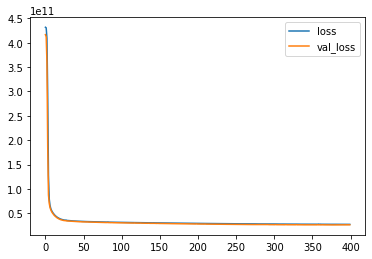

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluation on Test Data

In [47]:
predictions = model.predict(X_test)

In [50]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,predictions)))

Mean Absolute Error: 100460.75
Mean Squared Error: 26300441971.53
Root Mean Squared Error: 162174.11
Variance score is: 0.80


In [51]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

540296.5735055795

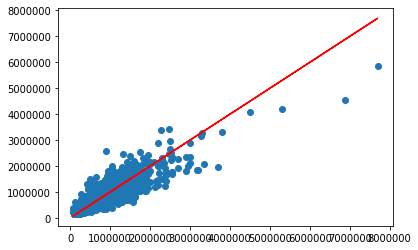

In [55]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

# Hoe we can use the model!

In [76]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [82]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))

In [83]:
# apply model on those featurs
model.predict(single_house)

array([[274631.34]], dtype=float32)

In [86]:
# compare the prediction with real price for the first column
Data['price'][0]

221900.0

In [ ]:
# still is not bad!!!!

# Method2: Multiple Linear Regression

In [95]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

542670.8390354038
[-33529.24116791  33843.03866511  81077.30774665   6941.35090678
   1032.44597577  57114.73857408  35828.53425577  19509.57589823
 116446.50244266  76074.50456938  25584.40614635 -73705.44328866
   7874.11830823  77923.54504249 -19377.01511404  20097.53015391
 -11206.49308816   3771.34879168  17102.07794083]


In [96]:
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
bedrooms,-33529.241168
bathrooms,33843.038665
sqft_living,81077.307747
sqft_lot,6941.350907
floors,1032.445976
waterfront,57114.738574
view,35828.534256
condition,19509.575898
grade,116446.502443
sqft_above,76074.504569


In [97]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,319000.0,357821.197937
1,464625.0,610289.969419
2,489950.0,594712.492633
3,395000.0,411237.364777
4,458000.0,497499.631726
5,465000.0,734441.046627
6,375000.0,478999.182126
7,275000.0,299896.917189
8,189900.0,79575.041731
9,273000.0,244573.116551


In [98]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 124545.85298457227
Mean Squared Error: 40177992191.37865
Root Mean Squared Error: 200444.48655769668
Variance score is: 0.69


In [99]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

540296.5735055795

In [103]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.70
Test Score 0.69
